In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.duplicated().sum()

3854

In [6]:
df.shape

(100000, 9)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])
df['smoking_history'] = label.fit_transform(df['smoking_history'])

In [10]:
df.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [11]:
df.diabetes

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [12]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


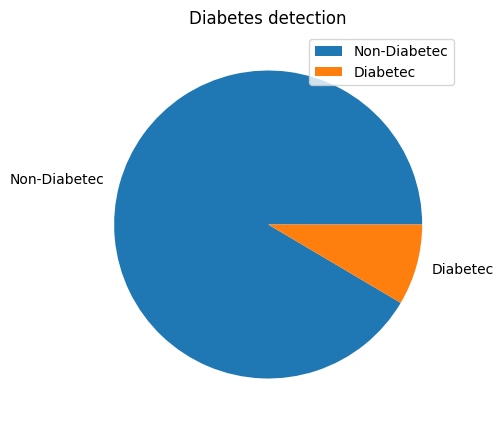

In [13]:
plt.figure(figsize=(5,5))
diabetes_counts=df['diabetes'].value_counts()
Name=['Non-Diabetec','Diabetec']
plt.pie(diabetes_counts, labels=Name)
plt.title('Diabetes detection')
plt.legend()
plt.show()

In [14]:
x= df.drop(columns=["diabetes"], axis= 1)
y= df["diabetes"]

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=0,stratify=y)

In [16]:
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
8020,0,32.0,0,0,4,19.64,5.8,140
58592,1,70.0,0,0,0,27.32,8.8,160
4524,0,19.0,0,0,4,34.58,6.5,100
318,0,27.0,0,0,4,20.67,6.2,159
93592,0,80.0,0,1,0,27.32,8.2,159
...,...,...,...,...,...,...,...,...
1808,0,36.0,0,0,4,27.32,4.8,155
88380,0,27.0,0,0,0,27.32,5.8,90
67698,0,45.0,0,0,4,27.32,3.5,126
3757,0,65.0,0,0,3,47.94,6.0,100


In [17]:
y_train

8020     0
58592    1
4524     0
318      0
93592    1
        ..
1808     0
88380    0
67698    0
3757     0
78525    0
Name: diabetes, Length: 75000, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier
fore = RandomForestClassifier(n_estimators=5, max_depth=30, random_state=50)
fore.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=5, random_state=50)

In [19]:
y_pred=fore.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(f'\nClassification Report:\n{classification_report(y_test,y_pred)}')
print(f'Accuracy Random Forest Classifier : {accuracy_score(y_test,y_pred)*100}%')

[[22662   213]
 [  632  1493]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.88      0.70      0.78      2125

    accuracy                           0.97     25000
   macro avg       0.92      0.85      0.88     25000
weighted avg       0.96      0.97      0.96     25000

Accuracy Random Forest Classifier : 96.61999999999999%


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
y_pred=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(f'\nClassification Report:\n{classification_report(y_test,y_pred)}')
print(f'Accuracy of K-Nearest Neighbors : {accuracy_score(y_test,y_pred)*100}%')

[[22770   105]
 [ 1084  1041]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22875
           1       0.91      0.49      0.64      2125

    accuracy                           0.95     25000
   macro avg       0.93      0.74      0.81     25000
weighted avg       0.95      0.95      0.95     25000

Accuracy of K-Nearest Neighbors : 95.244%


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adb= AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    random_state=200),
                   learning_rate=0.1, n_estimators=2000, random_state=1)

In [23]:
y_pred=adb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(f'\nClassification Report:\n{classification_report(y_test,y_pred)}')
print(f'Accuracy of AdaBoost Classifier : {accuracy_score(y_test,y_pred)*100}%')

[[22368   507]
 [  571  1554]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22875
           1       0.75      0.73      0.74      2125

    accuracy                           0.96     25000
   macro avg       0.86      0.85      0.86     25000
weighted avg       0.96      0.96      0.96     25000

Accuracy of AdaBoost Classifier : 95.68799999999999%


In [24]:
from sklearn.linear_model import LinearRegression
lnr= LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred= lnr.predict(x_test)
y_pred

array([ 0.16679738, -0.14299828, -0.05542789, ...,  0.22300502,
       -0.07576857, -0.01071454])

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
print(f'Accuracy of Linear Regression : {accuracy_score(y_test,y_pred_binary)*100}%')

Mean Squared Error: 0.050908813813285596
R2 Score: 0.3454347307838562
Confusion Matrix:
 [[22867     8]
 [ 1499   626]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     22875
           1       0.99      0.29      0.45      2125

    accuracy                           0.94     25000
   macro avg       0.96      0.65      0.71     25000
weighted avg       0.94      0.94      0.92     25000

Accuracy of Linear Regression : 93.972%


In [27]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred=dct.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(f'\nClassification Report:\n{classification_report(y_test,y_pred)}')
print(f'Accuracy of Decision Tree Classifier : {accuracy_score(y_test,y_pred)*100}%')

[[22246   629]
 [  567  1558]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22875
           1       0.71      0.73      0.72      2125

    accuracy                           0.95     25000
   macro avg       0.84      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000

Accuracy of Decision Tree Classifier : 95.216%


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

pregnancies = float(input("Enter number of pregnancies: "))
glucose = float(input("Enter glucose level: "))
blood_pressure = float(input("Enter blood pressure: "))
skin_thickness = float(input("Enter skin thickness: "))
insulin = float(input("Enter insulin level: "))
bmi = float(input("Enter BMI: "))
diabetes_pedigree_function = float(input("Enter diabetes pedigree function: "))
age = float(input("Enter age: "))

input_data = pd.DataFrame({'Pregnency':[pregnancies],'Glucose':[glucose],'Blood Pressure':[blood_pressure],'Skin thickness': skin_thickness,'Insulin':[insulin],
'BMI':[bmi],'Diabetes prediction function':[diabetes_pedigree_function ],'Age':[age]})
input_as_numpy_array = np.asarray(input_data)
input_reshaped_array = input_as_numpy_array.reshape(1,-1)
input_data_scaled = scaler.fit_transform(input_reshaped_array)

prediction = fore.predict(input_data_scaled)
print(prediction)
if prediction[0] == 1:
    print("The person is likely to have diabetes.")
else:
    print("The person is not likely to have diabetes.")

Enter number of pregnancies: 0
Enter glucose level: 90
Enter blood pressure: 89.7
Enter skin thickness: 55.6
Enter insulin level: 87
Enter BMI: 100
Enter diabetes pedigree function: 90
Enter age: 67
[0]
The person is not likely to have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: xlabel='bmi', ylabel='blood_glucose_level'>

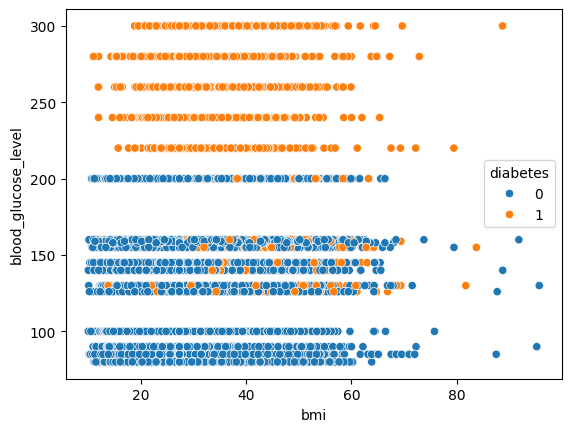

In [44]:
sns.scatterplot(x=df['bmi'],y=df['blood_glucose_level'], hue=df['diabetes'])